## **Importing the necessary libraries**

In [1]:
# Library used for data manipulation and analysis
import pandas as pd

# Library used for working with arrays
import numpy as np  

# Libraries for visualization
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns  

# This library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats

## **Binomial Distribution**

### **Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for LED light bulbs, that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.**

In [20]:
p = 0.05 # Probability of failure in the manufacturing process
n = 10 # Sample size 

k = np.arange(0, 11)
binomial = stats.binom.pmf(k, n, p)
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


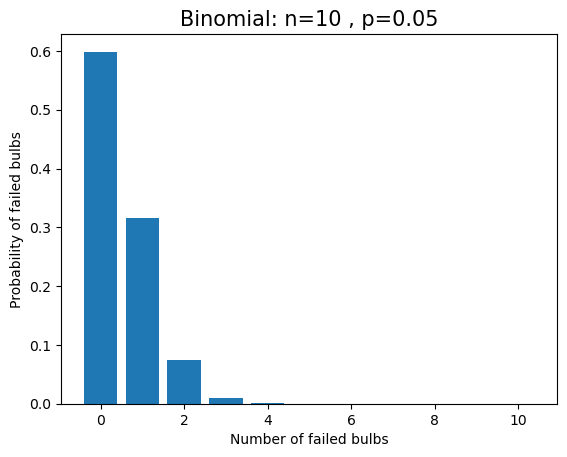

In [21]:
# plot the distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of failed bulbs") # set the x-axis label
plt.ylabel("Probability of failed bulbs") # set the y-axis label
plt.show() # display the plot

**a) What is the probability that none of the LED bulbs are defective?**

In [22]:
print("Probability of no defective bulbs is {}".format(binomial[0]))


Probability of no defective bulbs is 0.5987369392383787


**b) What is the probability that exactly one LED bulb is defective?**

In [34]:
print("Probability of one defective bulb is %.4f" % binomial[1])

Probability of one defective bulb is 0.3151


**c) What is the probability that two or fewer LED bulbs are defective?**

**Hint:** We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [36]:
cumulative_binomial = stats.binom.cdf(k, n, p)
print("Probability of two or fewer defective bulb is %.4f" % cumulative_binomial[2])

Probability of two or fewer defective bulb is 0.9885


**d) What is the probability that three or more LED bulbs are defective?**

**Hint:** We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [38]:
print("Probability of three or more defective bulb is %.4f" % (1 - cumulative_binomial[2]))

Probability of three or more defective bulb is 0.0115


### **Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of foul shots is 93%. Find the following probabilities.**

**a) What is the probability that the player will convert both the shots?**

In [44]:
print('The probability of making both shots %.4f' % stats.binom.pmf(2, 2, 0.93))

The probability of making both shots 0.8649


**b) What is the probability that the player will convert at least one shot?**

In [47]:
print('The probability of making one shot %.4f' % (1 - stats.binom.cdf(0, 2, 0.93)))

The probability of making one shot 0.9951


### **Q3. Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory, and 5% are rated as unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.**

**a) Two are rated as outstanding**

In [49]:
p = 0.1
n = 10
k = 2
print('The probability of two outstanding is %.4f' % stats.binom.pmf(k, n, p))

The probability of two outstanding is 0.1937


**b) Two or more are rated as outstanding**

In [61]:
p = 0.1
n = 10
k = 1

# Probability of one being outstanding
binom = stats.binom.cdf(k, n, p)

print('The probability of two or more outstanding is %.4f' % (1 - binom))

The probability of two or more outstanding is 0.2639


**c) Eight of the ten are rated either outstanding or excellent**

In [64]:
n = 10
p = 0.85
k = 8
print('The probability of 8 outstanding or excellent is %.4f' % stats.binom.pmf(k, n, p))

The probability of 8 outstanding or excellent is 0.2759


**d) None of the trainees are rated as unsatisfactory**

In [69]:
n = 10
p = 0.05
k = 0
print('The probability of unsatisfactory trainees  is %.4f' % stats.binom.pmf(k, n, p))

The probability of unsatisfactory trainees  is 0.5987


## **Uniform Distribution**

### **Q4. A university records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**

### **Loading the dataset**

In [72]:
assignment = pd.read_csv('datasets//assignment.csv')

assignment.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF** of a random variable (X) is the probability that X will take the value less than or equal to x. Mathematically, it can be represented as:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

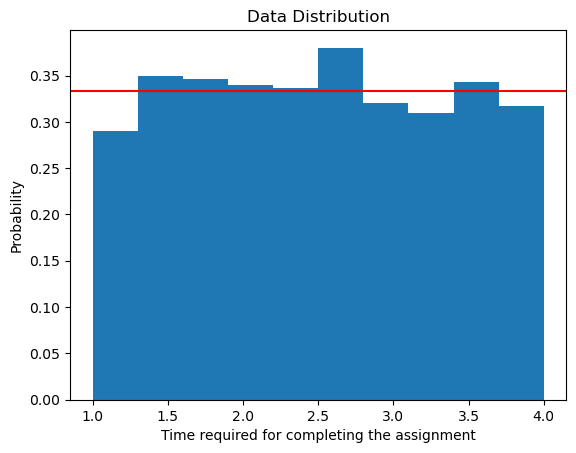

In [76]:
# Visualize the distribution of the time needed for completing the assignment
plt.hist(assignment['Time_taken'], density = True)
plt.axhline(1 / 3, color = 'red')
plt.xlabel('Time required for completing the assignment')

plt.ylabel('Probability')
plt.title('Data Distribution')

plt.show()

In [86]:
# Import the required function
from scipy.stats import uniform

mu = assignment.Time_taken.mean()
sigma = assignment.Time_taken.std()

# Use the uniform.pdf() function to generate the probability distribution
x = np.linspace(1, 4, 50)
probs = uniform.pdf(x, loc = 1, scale = 3)

print("Probability of  selected student requires at most 2.5hours is {:.4f} "\
      .format(uniform.cdf(2.5, loc = 1, scale = 3)))

Probability of  selected student requires at most 2.5hours is 0.5000 


**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X >= 3)$

In [87]:
print("Probability of  selected student requires at least 3 hours is {:.4f} "\
      .format(1 - uniform.cdf(3, loc = 1, scale = 3)))

Probability of  selected student requires at least 3 hours is 0.3333 


**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5 <= X <= 3.5)$

In [89]:
print("Probability of  selected student requires 1.5 to 3.5 hours is {:.4f} "\
      .format(uniform.cdf(3.5, loc = 1, scale = 3) - uniform.cdf(1.5, loc = 1, scale = 3)))

Probability of  selected student requires 1.5 to 3.5 hours is 0.6667 


## **Normal Distribution**

### **Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850, with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.**

**a) What is the probability that a randomly selected cell phone bill is more than Rs. 1200?**

In [90]:
round(1 - stats.norm.cdf(1200, loc = 850, scale = 150), 4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs. 750 and Rs. 1200?**

In [93]:
round(stats.norm.cdf(1200, loc = 850, scale = 150) - stats.norm.cdf(750, loc = 850, scale = 150), 4)

0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs. 650?**

In [95]:
round(stats.norm.cdf(650, loc = 850, scale = 150), 4)

0.0912

**d) What is the amount above which lies the top 15% of cell phone bills?**

**Hint:** Let the amount be $M$. 

$P(X ≥ M) = 0.15$

$=> 1 – P(X < M) = 0.15$

$=> P(X < M) = 0.85$

In [96]:
round(stats.norm.ppf(.85, loc = 850, scale = 150), 4)

1005.465

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [102]:
round(stats.norm.ppf(.25, loc = 850, scale = 150), 4)

748.8265

### **Q6. The mean filling capacity for a Coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.**

In [ ]:
mu = 500
sigma = 20

**a) What is the probability that the bottle filled less than 480 ml of Coke?**

In [103]:
round(stats.norm.cdf(480, loc = 500, scale = 20), 4)

0.1587

**b) What is the probability that the bottle filled more than 520 ml of Coke?**

In [106]:
round(1 - stats.norm.cdf(520, loc = 500, scale = 20), 4)

0.1587

**c) What is the probability that the bottle filled between 470 ml to 525 ml of Coke?**

In [107]:
round(stats.norm.cdf(525, loc = 500, scale = 20) - stats.norm.cdf(470, loc = 500, scale = 20), 4)

0.8275

### Q7: **In 2-liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.**

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [109]:
mu = 2.0
sigma = 0.05

round(stats.norm.cdf(2.0, loc = 2, scale = 0.05) - stats.norm.cdf(1.9, loc = 2, scale = 0.05), 4)

0.4772

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [110]:
round(stats.norm.cdf(2.1, loc = 2, scale = 0.05) - stats.norm.cdf(1.9, loc = 2, scale = 0.05), 4)

0.9545

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [112]:
round(stats.norm.cdf(1.9, loc = 2, scale = 0.05) + (1 - stats.norm.cdf(2.1, loc = 2, scale = 0.05)), 4)

0.0455

**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [116]:
round(stats.norm.ppf(.01, loc = 2, scale = 0.05), 2)

1.88

## **Sampling Distribution**

### **Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

In [118]:
mean = 60
sigma = 6
n = 40

s = sigma/np.sqrt(n)

round(stats.norm.cdf(58, loc = 60, scale = s), 4)

0.0175

**Insight:** 

The probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months is 1.75%.

## **Interval Estimation**

### **Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating the 95% confidence interval for the mean usage in the first quarter of 2022.**

In [122]:
x_bar, sigma, n = 310, 89, 40

s = sigma/np.sqrt(n)

# Construct the confidence interval
np.round(stats.norm.interval(.95, loc = x_bar, scale = s), 4)

array([282.4191, 337.5809])

## **Hypothesis Testing**

### **Q10. You are the manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.**

Null hypothesis is that the population mean has not changed from the mean value of 4.5 minutes
Alternate hypothesis is that population mean is not 4.5 minutes

>$H_0 : µ = 4.5 $
>$H_1 : µ \neq 4.5 $ 

### **Q11. Find the p-value of a two-tailed hypothesis test if the Z-stat = +2.00?**